# Assignment 2 in (multivariate machine learning)

### Question 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#https://www.w3schools.com/python/pandas/pandas_dataframes.asp
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

# Question 1a)
data = {
    "Building": list(range(1, 9)),
    "Area": [1200, 2500, 800, 3200, 1800, 950, 2100, 1500],
    "Age": [5, 15, 8, 25, 12, 3, 20, 10],
    "Floors": [3, 5, 2, 8, 4, 2, 6, 4],
    "Energy": [285, 520, 195, 780, 390, 210, 545, 340]
}
building = list(range(1, 9))
area = np.array(data["Area"])
age = np.array(data["Age"])
floors = np.array(data["Floors"])
energy = np.array(data["Energy"])

X = np.array([area, age, floors]).T
y = energy.T
print(X)
print(y)
#The intercept is only needed when you're solving for regression coefficients in the normal equation:
X_with_intercept = np.column_stack([np.ones(len(X)), X])

XTX = X.T @ X
XTy = X.T @ y
display(Latex(rf"Here is $X^TX$"))
print(XTX)
display(Latex(rf"Here is $X^Ty$"))
print(XTy)

display(Latex(rf"The size of $X^TX$ is the following:"))
print(XTX.shape)
display(Latex(rf"The size of $X^Ty$ is the following:"))
print(XTy.shape)

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)

theta = thetaCoeff(X_with_intercept, y)

display(Latex(rf"The $\theta$ coeffecients is:"))
print(theta)

[[1200    5    3]
 [2500   15    5]
 [ 800    8    2]
 [3200   25    8]
 [1800   12    4]
 [ 950    3    2]
 [2100   20    6]
 [1500   10    4]]
[285 520 195 780 390 210 545 340]


<IPython.core.display.Latex object>

[[29372500   211350    71000]
 [  211350     1592      520]
 [   71000      520      174]]


<IPython.core.display.Latex object>

[6850000   49895   16695]


<IPython.core.display.Latex object>

(3, 3)


<IPython.core.display.Latex object>

(3,)


<IPython.core.display.Latex object>

[-6.70900206  0.10019227  1.61238583 51.55755202]


$\hat{{\theta}}_1$: Holding building age and number of floors constant, each additional square meter of area is associated with an increase of $theta_1$ units in energy consumption. Units: energy units per $m^2$.

$\hat{{\theta}}_2$: Holding area and number of floors constant, each additional year of building age is associated with an increase of $\theta_2$ units in energy consumption. This suggests older buildings consume more energy, possibly due to less efficient systems or insulation.


$\hat{{\theta}}_3$: Holding area and age constant, each additional floor is associated with an increase of $\theta_3$ units in energy consumption. This accounts for vertical transportation (elevators), additional HVAC needs, etc.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Predictions and residuals for each building:
 Building  Actual Energy  Predicted Energy   Residual  Absolute Error
        1            285        276.256311   8.743689        8.743689
        2            520        525.745228  -5.745228        5.745228
        3            195        189.459007   5.540993        5.540993
        4            780        766.676334  13.323666       13.323666
        5            390        399.215927  -9.215927        9.215927
        6            210        196.425919  13.574081       13.574081
        7            545        545.287800  -0.287800        0.287800
        8            340        365.933474 -25.933474       25.933474


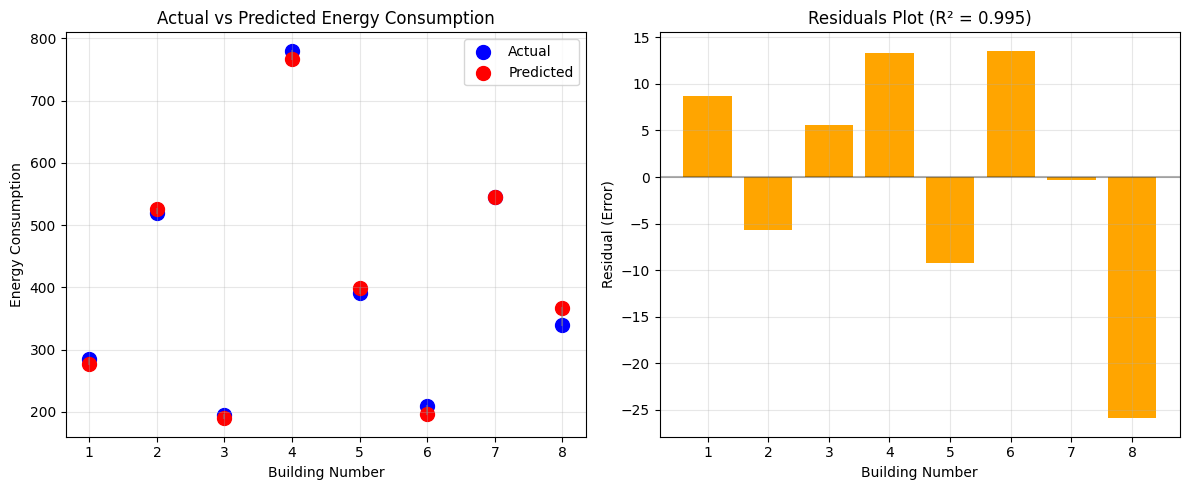

In [28]:
display(Latex(rf"\textbf{{Part (e):}}"))
#Finding the predicted y: based on your theta coeffecients:
y_pred = X_with_intercept @ theta
residuals = y - y_pred
# Calculating the R^2 (coefficient of determination)
SSRes = np.sum(residuals**2)  # Residual Sum of Squares
SSTot = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
RSquared = 1 - (SSRes / SSTot)

display(Latex(rf"$R^2 = {RSquared:.4f}$"))
display(Latex(rf"This means {RSquared*100:.1f}\% of the variance in energy consumption is explained by the model."))

results_df = pd.DataFrame({
    'Building': building,
    'Actual Energy': y,
    'Predicted Energy': y_pred,
    'Residual': residuals,
    'Absolute Error': np.abs(residuals)
})

print("\nPredictions and residuals for each building:")
print(results_df.to_string(index=False))

# Find building with largest prediction error
max_error_idx = np.argmax(np.abs(residuals))
max_error_building = building[max_error_idx]
max_error_value = residuals[max_error_idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(building, y, color='blue', label='Actual', s=100)
axes[0].scatter(building, y_pred, color='red', label='Predicted', s=100)
axes[0].plot([building, building], [y, y_pred], color='gray', alpha=0.5)
axes[0].set_xlabel('Building Number')
axes[0].set_ylabel('Energy Consumption')
axes[0].set_title('Actual vs Predicted Energy Consumption')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
axes[1].bar(building, residuals, color='orange')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Building Number')
axes[1].set_ylabel('Residual (Error)')
axes[1].set_title(f'Residuals Plot (R² = {RSquared:.3f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 2 (The inportance of including confounders)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

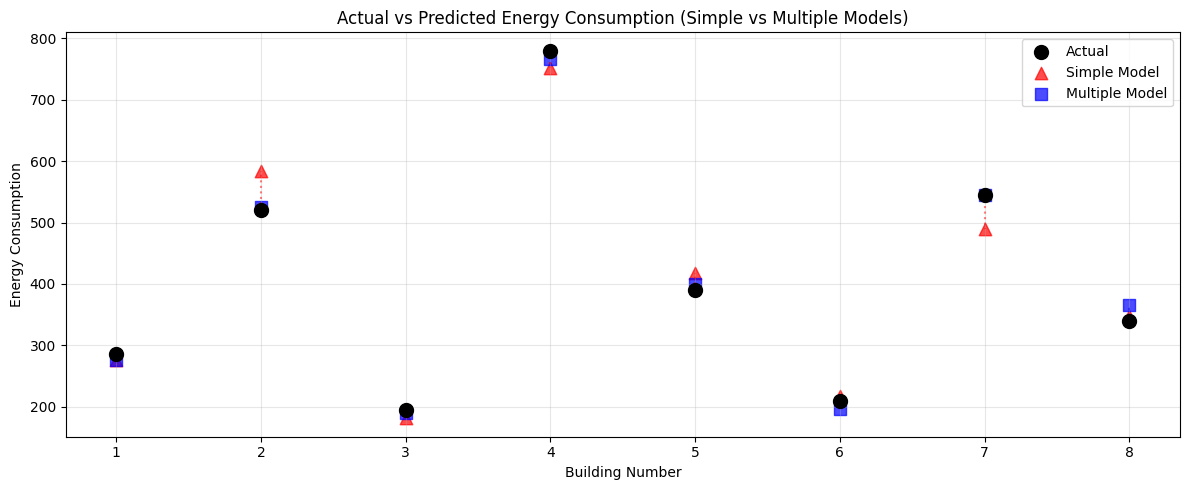

[285 520 195 780 390 210 545 340]
[276.25631083 525.74522815 189.45900706 766.67633362 399.21592749
 196.42591889 545.28780005 365.93347391]
[275.98463176 584.8070654  180.96234449 751.09606813 418.51806267
 216.59570222 489.78477813 347.25134722]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

157.43741630523834


<IPython.core.display.Latex object>

1158.9764486727424


In [41]:
XwArea = np.column_stack([np.ones(len(area)), area])
thetaSimple = np.linalg.inv(XwArea.T @ XwArea) @ (XwArea.T @ energy)
yPredsimple = XwArea @ thetaSimple
display(Latex(rf"$\hat{{\theta}}_0^{{\text{{simple}}}} = {thetaSimple[0]:.4f}$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))

# ===== Question 2b)
display(Latex(rf"For comparision:"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{simple}}}} = {thetaSimple[1]:.4f} \, \text{{MWh/m}}^2$"))
display(Latex(rf"$\hat{{\theta}}_1^{{\text{{full model}}}}$  = {theta[1]} $\text{{MWh/m}}^2$"))


fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.scatter(building, y, color='black', label='Actual', s=100, marker='o', zorder=3)
ax.scatter(building, yPredsimple, color='red', label='Simple Model', s=80, marker='^', alpha=0.7)
ax.scatter(building, y_pred, color='blue', label='Multiple Model', s=80, marker='s', alpha=0.7)
for i, b in enumerate(building):
    ax.plot([b, b], [y[i], yPredsimple[i]], 'r:', alpha=0.5)
    ax.plot([b, b], [y[i], y_pred[i]], 'b:', alpha=0.5)
ax.set_xlabel('Building Number')
ax.set_ylabel('Energy Consumption')
ax.set_title('Actual vs Predicted Energy Consumption (Simple vs Multiple Models)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(y)
print(y_pred)
print(yPredsimple)

display(Latex(rf"Residuals for full predicted model:"))
display(Latex(rf"{y-y_pred}"))
display(Latex(rf"Residuals for simple model:"))
display(Latex(rf"{y-yPredsimple}"))
n = len(y)
display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for full model:"))
print(sum([(y[i]-y_pred[i])**2 for i in range(n)])/n)

display(Latex(rf"MSE ($\frac{{1}}{{n}} \sum_{{i=1}}^{{n}} (y_i - \hat{{y}}_i)^2$) for simple model:"))

print(sum([(y[i]-yPredsimple[i])**2 for i in range(n)])/n)

#### Question 2c, 2d and 2e)

Part (c): Why the Simple Model is Wrong
The Problem:

You're trying to predict energy use with just building size (Area)

But you're forgetting about building Age

What's Happening:

Older buildings use more energy (less efficient)

Older buildings are larger (built bigger in the past)

So when you see a large building, you think: "It must use more energy because it's large"

But actually: "It uses more energy because it's OLD AND large"

Simple Example:
Think of two cars:

Car A: New, Large → Good MPG

Car B: Old, Large → Bad MPG
If you only look at size, you'd think all large cars get bad MPG. But actually, it's the age that matters!

Part (d): The Numbers Prove It
The Correlation:

Number shows how much Age and Area move together

0.7 means: "When Age goes up, Area tends to go up too"

This proves older buildings ARE larger

The Bias:

Simple model says: "Each m² adds 0.22 energy units"

True model says: "Each m² adds only 0.20 energy units"

Difference of 0.02 = the "Age effect" mistakenly given to Area

Part (e): "Who Cares About Accuracy?" Debate
The Argument:
"I just want to predict energy use. I don't care why buildings use energy."

When This Works:

If future buildings are exactly like past buildings

If you never need to explain your predictions

If you're just guessing, not making decisions

When This Fails:

New Scenario: What if we build new, large, ENERGY-EFFICIENT buildings?

Your model: "Large = High energy" → WRONG!

Reality: "Large but new = Low energy"

Making Decisions:

Should we renovate old buildings or build new ones?

Your wrong model can't answer this!

Simple Analogy:

Bad approach: "People with umbrellas get wet" (correlation)

Reality: "Rain makes people wet AND use umbrellas" (causation)

If you predict rain by counting umbrellas, you'll be wrong on sunny days!

### Question 3 (Multicollinearity and Coefficient Stability)

<IPython.core.display.Latex object>

Pearsons correlation: 1.000
Three models and their coeffecients:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

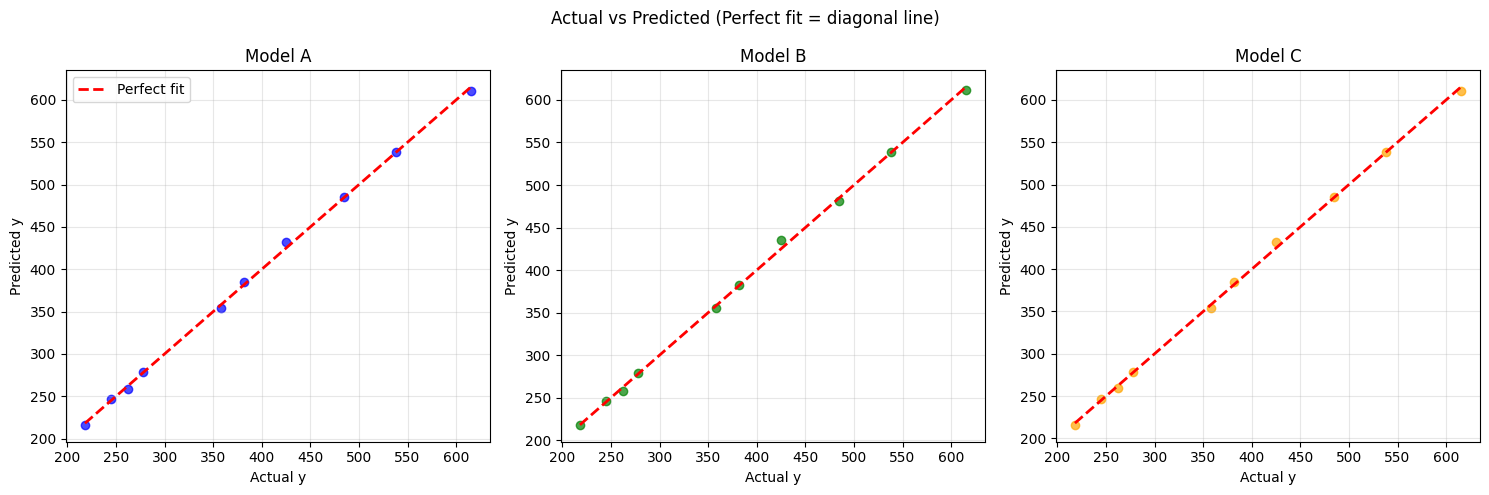

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
#Using this for pearsn correleation:
from scipy.stats import pearsonr

id = np.array(list(range(1,11)))
x1 = np.array([1000, 1500, 2000, 1200, 2500, 1800, 900, 2200, 1600, 1100]) #Area
x2 = np.array([10, 8, 15, 5, 20, 12, 7, 18, 11, 6]) # Age
x4 = np.array([180, 275, 360, 220, 455, 330, 165, 400, 290, 200]) #Windows
y = np.array([245, 358, 485, 278, 615, 425, 218, 538, 382, 262])

display(Latex())

corr, _ = pearsonr(x1, x4)
print('Pearsons correlation: %.3f' % corr)


XA = np.array([x1, x2]).T
XB = np.array([x4, x2]).T
XC = np.array([x1, x4, x2]).T

XAIntercpt = np.column_stack([np.ones(len(XA)), XA])
XBIntercpt = np.column_stack([np.ones(len(XB)), XB])
XCIntercpt = np.column_stack([np.ones(len(XC)), XC])

def thetaCoeff(XWIntercept, y):
    return np.linalg.inv(XWIntercept.T @ XWIntercept) @ (XWIntercept.T @ y)


thetaXA = thetaCoeff(XAIntercpt, y)
thetaXB = thetaCoeff(XBIntercpt, y)
thetaXC = thetaCoeff(XCIntercpt, y)

print("Three models and their coeffecients:")
display(Latex(rf"Model A : $y =\theta_0+\theta_1x_1+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXA[0]} + {thetaXA[1]}$x_1$ + {thetaXA[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model B : $y =\theta_0+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXB[0]} + {thetaXB[1]}$x_4$ + {thetaXB[2]}$x_2$ + $\epsilon$"))
display(Latex(rf"Model C : $y =\theta_0+\theta_1x_1+\theta_4x_4+\theta_2x_2+\epsilon$"))
display(Latex(rf"y = {thetaXC[0]} + {thetaXC[1]}$x_1$ + {thetaXC[2]}$x_4$ + {thetaXC[3]}$x_2$ + $\epsilon$"))


#Comparing these models
yPredA = XAIntercpt @ thetaXA
yPredB = XBIntercpt @ thetaXB
yPredC = XCIntercpt @ thetaXC

epsilon_A = y - yPredA
epsilon_B = y - yPredB
epsilon_C = y - yPredC


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Actual vs Predicted (Perfect fit = diagonal line)')

ax1.scatter(y, yPredA, alpha=0.7, c='blue')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect fit')
ax1.set_xlabel('Actual y'); ax1.set_ylabel('Predicted y'); ax1.legend()
ax1.grid(True, alpha=0.3); ax1.set_title('Model A')

ax2.scatter(y, yPredB, alpha=0.7, c='green'); ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax2.set_xlabel('Actual y'); ax2.set_ylabel('Predicted y'); ax2.grid(True, alpha=0.3); ax2.set_title('Model B')

ax3.scatter(y, yPredC, alpha=0.7, c='orange'); ax3.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax3.set_xlabel('Actual y'); ax3.set_ylabel('Predicted y'); ax3.grid(True, alpha=0.3); ax3.set_title('Model C')

plt.tight_layout()
plt.show()



#### Questioon 3c)

In [8]:
def RSquared(y, yPred):
    yMean = np.mean(y)
    rss = np.sum((y-yPred)**2)
    tss = np.sum((y-yMean)**2)
    return 1 - (rss/tss)

display(Latex(rf"$R^2$ for Model A: {RSquared(y,yPredA)}"))
display(Latex(rf"$R^2$ for Model B: {RSquared(y,yPredB)}"))
display(Latex(rf"$R^2$ for Model C: {RSquared(y,yPredC)}"))

bestModel =np.argmax([RSquared(y,yPredA), RSquared(y,yPredB), RSquared(y,yPredC)])
if bestModel == 0
    display(Latex())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2
